___

In [238]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Exercise 1: Regression (30pts)
**Dataset**: "ventas_de_autos.csv"  
**Link**: https://drive.google.com/file/d/1Uy4I3xus9Rh2MlhEkLNFo10FKuSNKdTQ/view?usp=sharing

*Context:  
In a job setting, you're asked to predict car sales based on various variables collected by data engineers. A clear interpretation is expected regarding the factors that determine a car’s sales.*

1. Train a regression model using statsmodels. (5pts/30pts)  
2. Should we consider a variable that has a p-value lower than 0.5? (5pts/30pts)  
3. Which variable in your regression has a p-value lower than 0.5? (2.5pts/30pts)  
4. Keeping all other variables constant, what is the expected increase in sales if the car is from Japan? (5pts/30pts)  
5. Keeping all other variables constant, what is the expected increase or decrease in sales if the car's age increases by 1? (5pts/30pts)  
6. Predict the sales for a car with 116,000 kilometers, origin country is the United States, magazine ranking is 150, market price is 50,000, and manufacturing year is 2015. (7.5pts/30pts)


In [239]:
df_ventas_autos = pd.read_csv("ventas_de_autos.csv", delimiter='|')
df_ventas_autos.head()

,Unnamed: 0,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05


In [240]:
df_ventas_autos.drop(['Unnamed: 0'], axis=1, inplace=True)

In [241]:
df_ventas_autos.head()

,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05


In [242]:
df_ventas_autos.columns

Index(['Kilometraje', 'Pais de Origen', 'Ranking en revistas de auto',
       'precio en mercado libre', 'fecha_de_elaboracion', 'ventas'],
      dtype='object')

``` python
def validate_columns(df):
    summary_df = df.describe(include='all').T
    summary_df['Num_Null_Values'] = df.isnull().sum()
    summary_df['%_Null_Values'] = (summary_df['Num_Null_Values'] / len(df)) * 100
    sample_unique_values = df.sample(min(5, len(df)), axis=0).T
    summary_df['Sample_Unique_Values'] = sample_unique_values.values.tolist()
    summary_df = summary_df.rename(columns={'unique': 'Unique_Values', 'count': 'Num_Unique_Values'})
    summary_df = summary_df[['Unique_Values', 'Num_Unique_Values', 'Num_Null_Values', '%_Null_Values', 'Sample_Unique_Values']]
    return summary_df
```

In [243]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_ventas_autos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Kilometraje,NaN,15.0,0,0.0,"[18852.031348587952, 192914.2382977007, 130949..."
Pais de Origen,7,15,0,0.0,"[Francia, Alemania, Corea del Sur, Italia, Est..."
Ranking en revistas de auto,NaN,15.0,0,0.0,"[460, 33, 266, 399, 203]"
precio en mercado libre,NaN,15.0,0,0.0,"[21963.67095952316, 41496.499293785935, 25562...."
fecha_de_elaboracion,15,15,0,0.0,"[2021-03-11, 2022-09-17, 2018-08-04, 2022-09-1..."
ventas,NaN,15.0,0,0.0,"[411107.08874319214, 799954.0424012962, 481685..."


In [244]:
df_ventas_autos.dtypes

Kilometraje                    float64
Pais de Origen                  object
Ranking en revistas de auto      int64
precio en mercado libre        float64
fecha_de_elaboracion            object
ventas                         float64
dtype: object

In [245]:
df_ventas_autos["fecha_de_elaboracion"] = pd.to_datetime(df_ventas_autos["fecha_de_elaboracion"])

In [246]:
df_ventas_autos.dtypes

Kilometraje                           float64
Pais de Origen                         object
Ranking en revistas de auto             int64
precio en mercado libre               float64
fecha_de_elaboracion           datetime64[ns]
ventas                                float64
dtype: object

``` python
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        box = axs[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
```

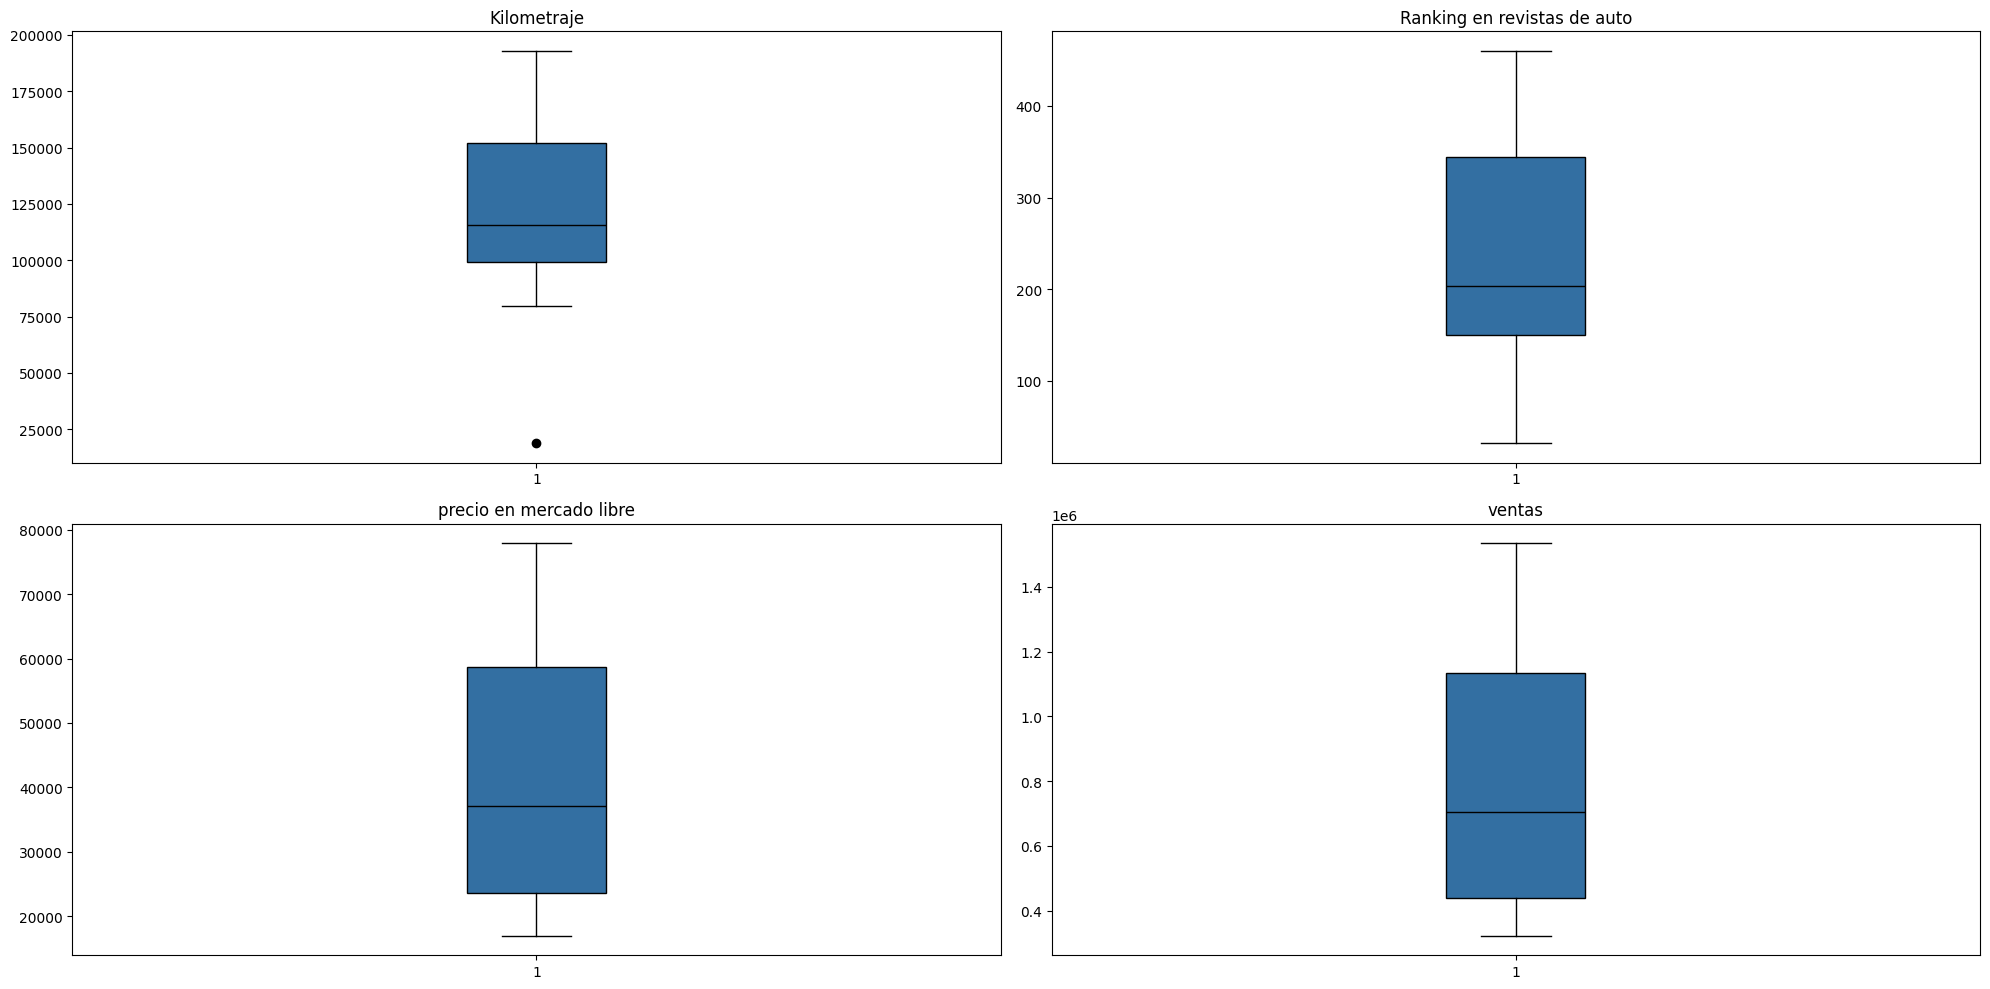

In [247]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_ventas_autos)

``` python
def reconocimiento_de_outliers(df, column, scale_factor=1.5):
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - scale_factor * iqr
    upper_bound = q3 + scale_factor * iqr
    
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_values = data[outliers]

    print(f"Outliers de {column}:")
    print(outlier_values)
    
    return outliers, outlier_values
```

In [248]:
from funciones.funciones_parcial2 import reconocimiento_de_outliers

outliers_kilometraje, outlier_values_kilometraje = reconocimiento_de_outliers(df_ventas_autos, "Kilometraje", 1.5)


Outliers de Kilometraje:
14    18852.031349
Name: Kilometraje, dtype: float64


``` python
def remove_outliers(df, column, outliers):
    if column in df.columns:
        df = df.drop(df[outliers].index)
    
    return df
```

In [249]:
from funciones.funciones_parcial2 import remove_outliers

df_ventas_autos = remove_outliers(df_ventas_autos, "Kilometraje", outliers_kilometraje)

#### I remove the mileage outlier since it is a very low value that does not fall within the average of the other values.


In [250]:
df_ventas_autos.columns = df_ventas_autos.columns.str.replace(' ', '_')
#Pone guion bajo en las columnas para poder llamarlas

#### I create the car age column by subtracting the manufacturing year from the current year.


In [251]:
df_ventas_autos["hoy"]= "2023-12-14"
df_ventas_autos['hoy'] = pd.to_datetime(df_ventas_autos['hoy'])
df_ventas_autos['fecha_de_elaboracion'] = pd.to_datetime(df_ventas_autos['fecha_de_elaboracion'])
df_ventas_autos['edad_del_auto'] = (df_ventas_autos['hoy'] - df_ventas_autos['fecha_de_elaboracion']).dt.days//365

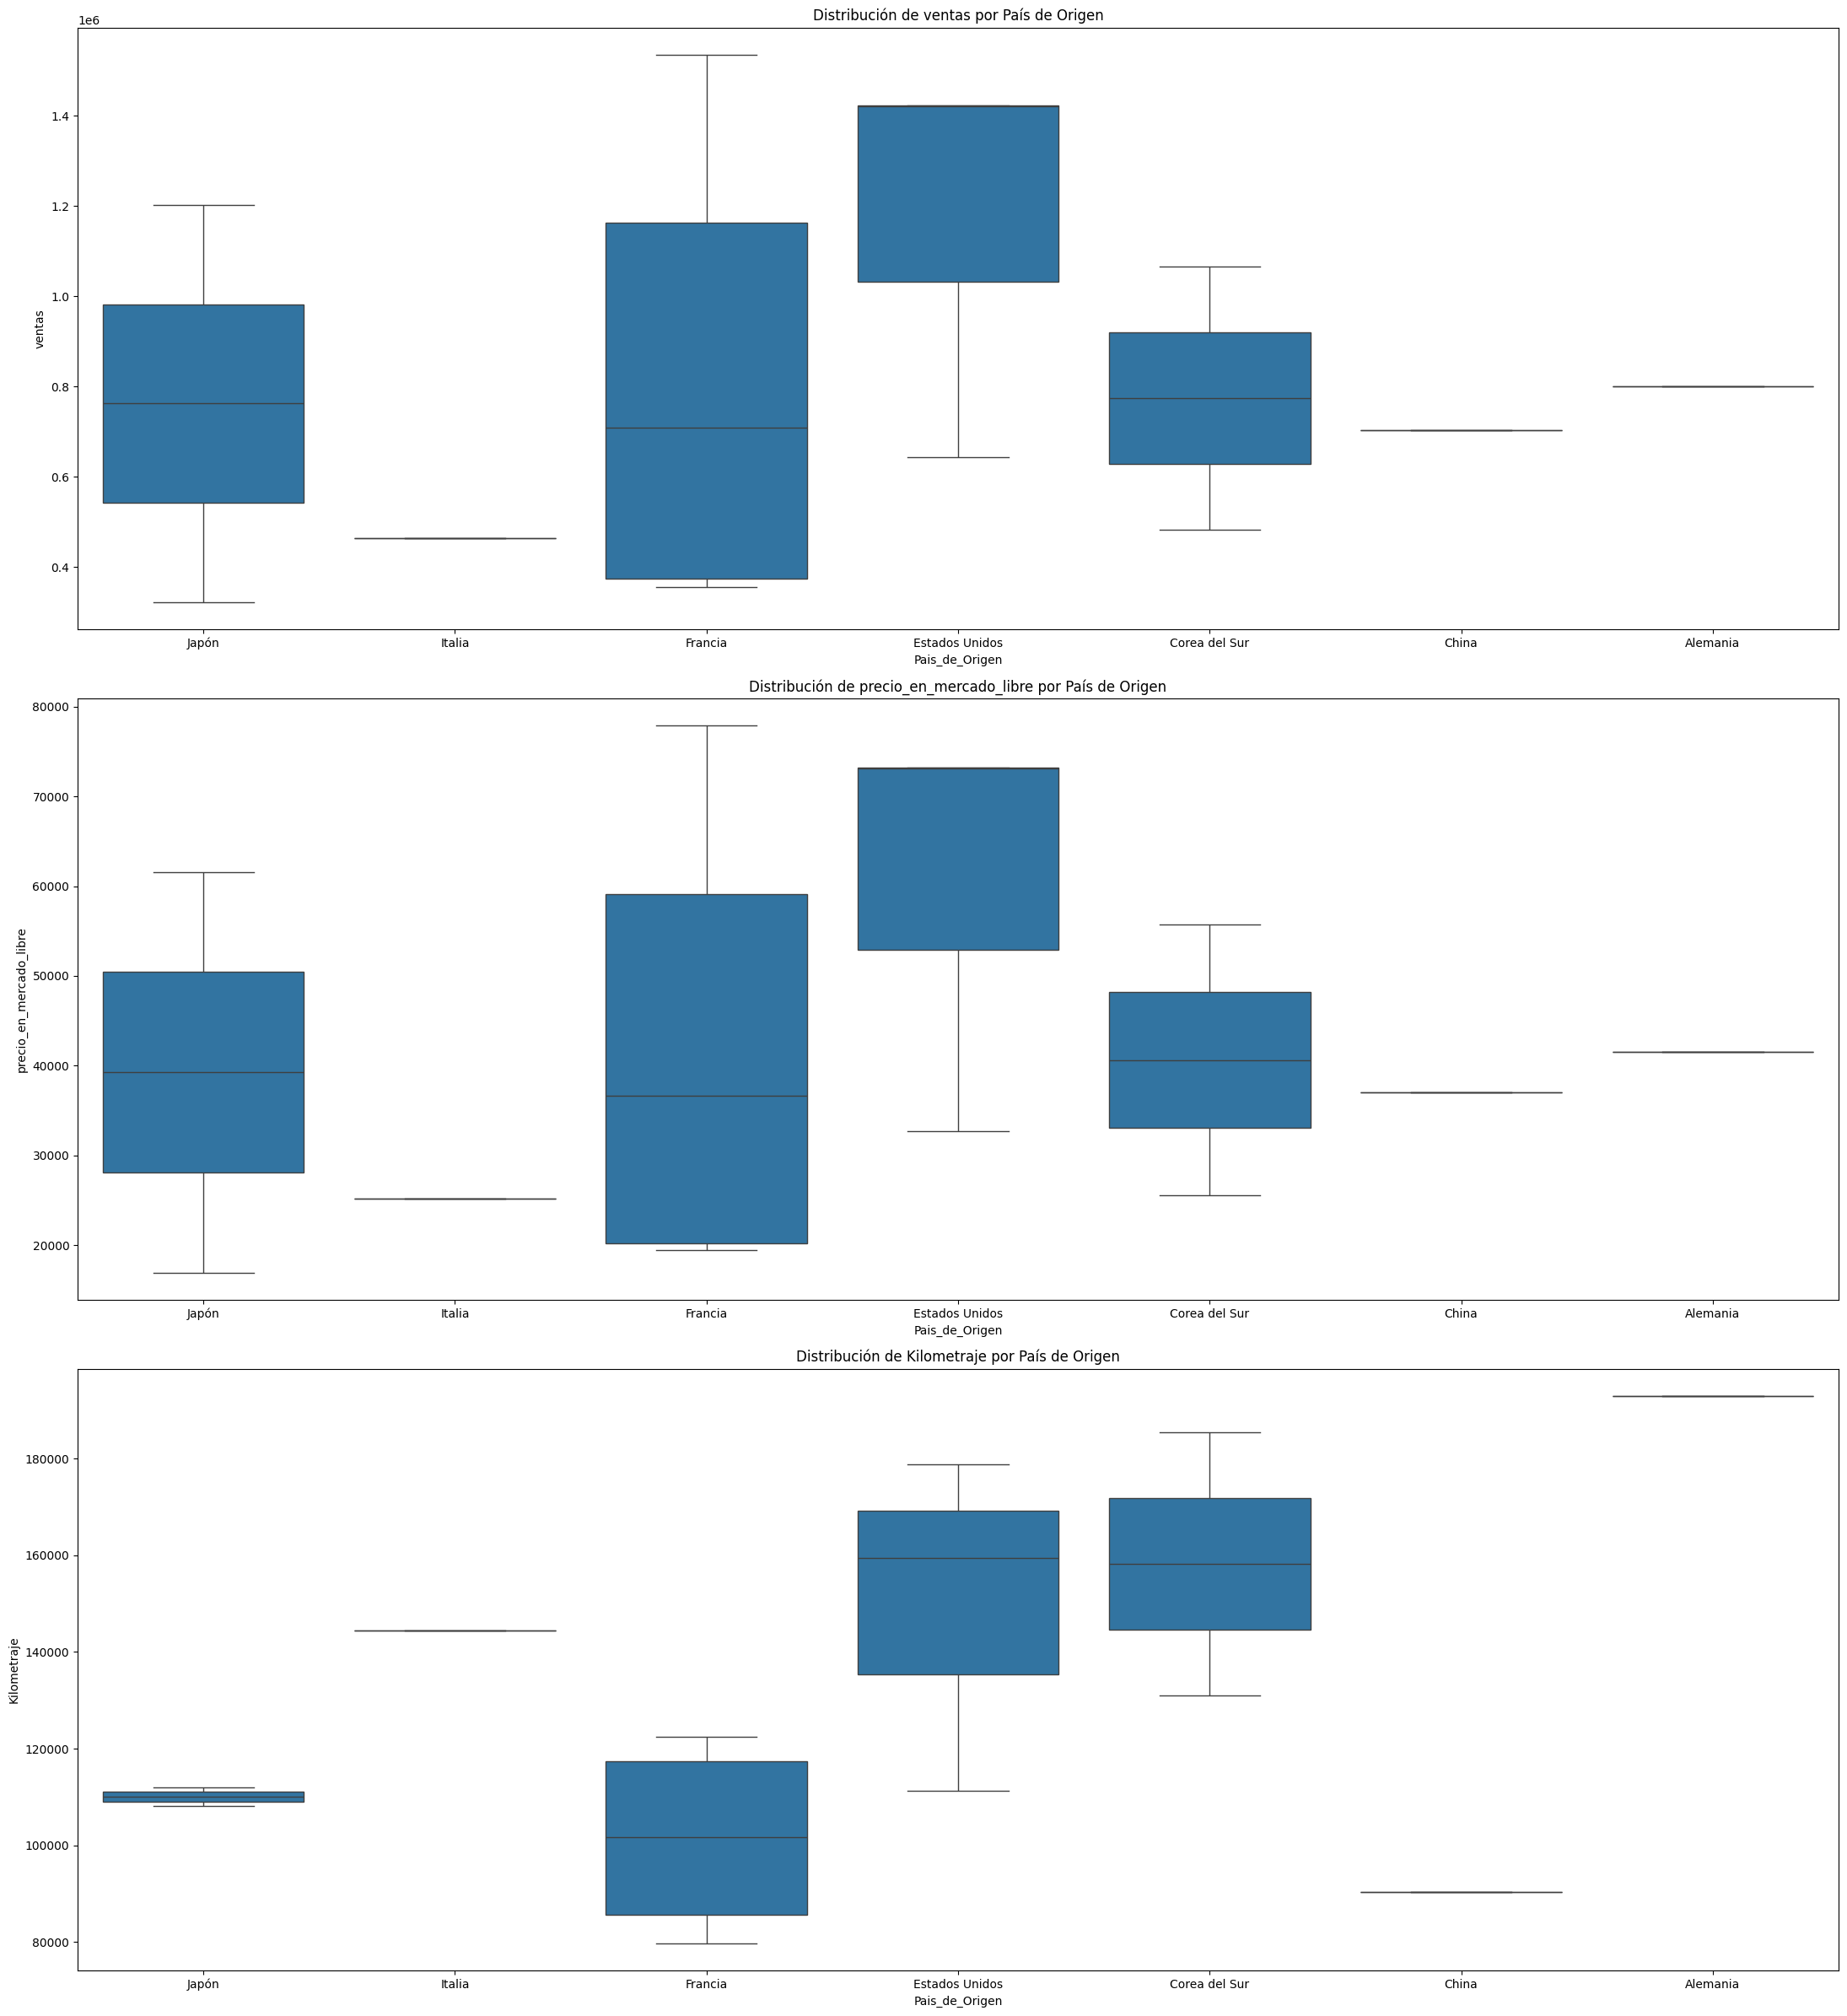

In [252]:
otras_variables = ['ventas', "precio_en_mercado_libre", "Kilometraje"]

plt.figure(figsize=(22, 24))
for i, variable in enumerate(otras_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Pais_de_Origen', y=variable, data=df_ventas_autos)
    plt.title(f'Distribución de {variable} por País de Origen')

plt.tight_layout()
plt.show()

*In a job setting, you are asked to predict car sales based on the different variables collected by the data engineers. A clear interpretation is expected regarding the reasons that determine a car's sales.*

1. Train a regression model using statsmodels. (5pts/30pts)


``` python
def crear_heatmap_correlacion(df):
    def seleccionar_columnas_numericas(df):
        return df.select_dtypes(include=['float64', 'int64'])
    df_numeric = seleccionar_columnas_numericas(df)
    df_numeric = df_numeric.drop(columns=[col for col in df_numeric.columns if col.startswith("Unnamed:") or col.strip() == ""])
    corr_matrix = df_numeric.corr()

    plt.figure(figsize=(10, 10))
    sns.heatmap(
        round(corr_matrix, 2),
        cmap='coolwarm',
        annot=True,
        annot_kws={"size": 10}
    )
    plt.show()
```

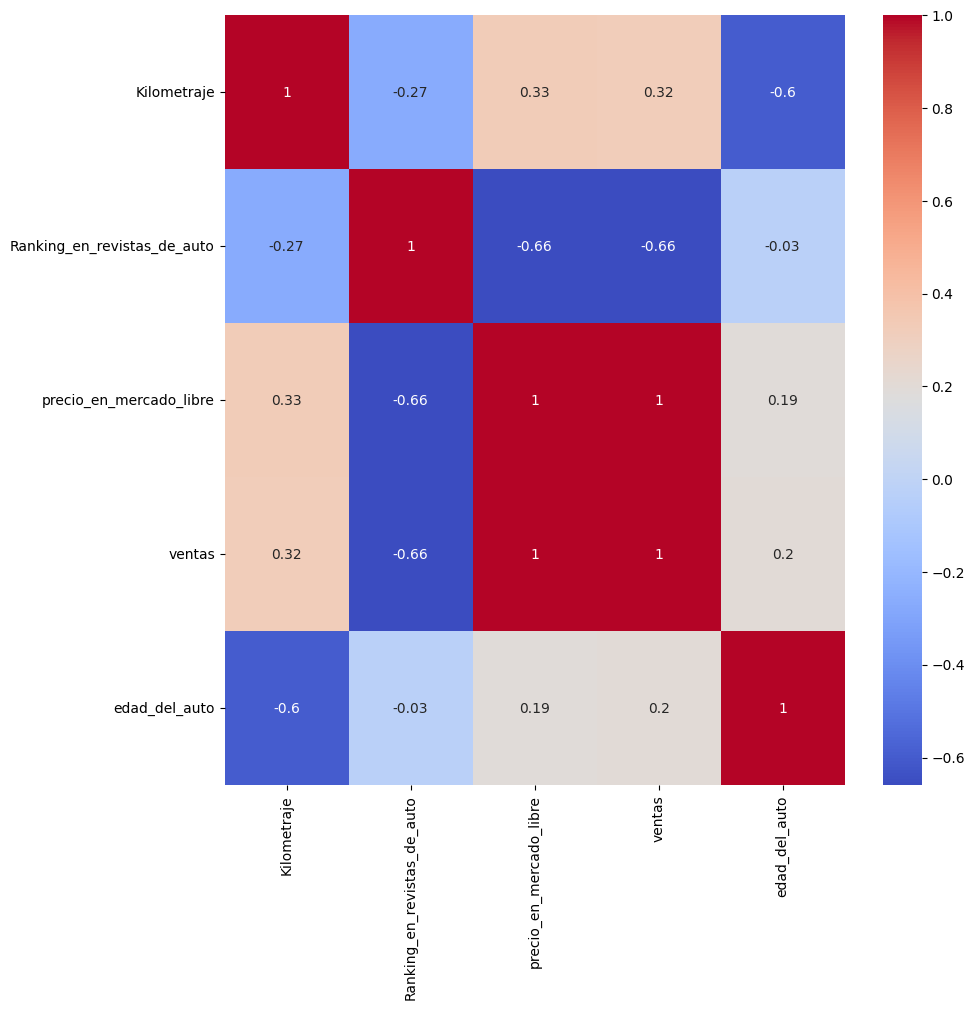

In [253]:
from funciones.funciones_parcial2 import crear_heatmap_correlacion
crear_heatmap_correlacion(df_ventas_autos)

In [254]:
df_ventas_autos.head()

,Kilometraje,Pais_de_Origen,Ranking_en_revistas_de_auto,precio_en_mercado_libre,fecha_de_elaboracion,ventas,hoy,edad_del_auto
0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06,2023-12-14,9
1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05,2023-12-14,1
2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05,2023-12-14,6
3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05,2023-12-14,7
4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05,2023-12-14,8


In [255]:
features = ['Kilometraje', 'precio_en_mercado_libre', "Ranking_en_revistas_de_auto", "edad_del_auto", "C(Pais_de_Origen)"]

In [1]:
formula = "ventas ~ " + ' + '.join(features)
formula

NameError: name 'features' is not defined

In [257]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula=formula, data=df_ventas_autos)
modelo = modelo.fit()
print(modelo.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     2911.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.44e-06
Time:                        10:53:20   Log-Likelihood:                -136.75
No. Observations:                  14   AIC:                             295.5
Df Residuals:                       3   BIC:                             302.5
Df Model:                          10                                         
Covariance Type:            nonrobust   

#### A low p-value (typically below 0.05) indicates that the coefficient is significant, and therefore should not be removed from the model. If it is greater than 0.05, the coefficient can be considered not significant and could be removed from the model.

#### To answer the question, a variable with a p-value lower than 0.5 should not be considered. This is quite a high threshold and may lead to a higher likelihood of committing Type I errors (falsely rejecting the null hypothesis when it is actually false).



3. Which variable in your regression has a p-value lower than 0.5? (2.5pts/30pts)


#### The variables in my multivariable linear regression that have a p-value lower than 0.5 are the following:

- Country of origin: China  
- Country of origin: South Korea  
- Country of origin: France  
- Mileage  
- Mercado Libre price


4. Keeping all variables constant, what is the expected increase in sales if the car is from Japan? (5pts/30pts)


#### The coefficient for Japan in the model is (-15320). This means that, keeping all other variables constant, the model predicts that sales will decrease by 15,320 units if the car is from Japan.


5. Keeping all variables constant, what is the expected increase or decrease in sales if the car's age increases by 1 year? (5pts/30pts)


#### The coefficient for car_age in the model results is 680.0104. This means that, keeping all other variables constant, the model predicts that sales will increase by 680.0104 units if the car's age increases by 1 year.


6. Predict the sales for a car with 116,000 kilometers, country of origin is the United States, magazine ranking is 150, Mercado Libre price is 50,000, and manufacturing year is 2015. (7.5pts/30pts)


In [258]:
df_entrada = pd.DataFrame({
    'Kilometraje': [116000],
    'Pais_de_Origen': ["Estados Unidos"], 
    'Ranking_en_revistas_de_auto': [150],
    'precio_en_mercado_libre': [50000],
    'edad_del_auto': [2023 - 2015]
})

prediccion = modelo.predict(df_entrada)

print(f"La predicción de ventas para el auto es: {prediccion[0]}")

La predicción de ventas para el auto es: 984957.4166312594


___

# Exercise 2: Classification (40pts)
**dataset**: "leads_a_clientes.csv"  
**link**: https://drive.google.com/file/d/1v0o7z70v06NIaBbmo6kwXdZX6pPf8Bdr/view?usp=sharing

*Context:  
Leads refer to those customers who are prospects — that is, potential customers who later decide whether or not to become actual clients. Your hypothesis is that, based on customer interaction with the company and their characteristics, some clients have a higher probability of conversion than others.*

1. Calculate the variable "age" (2pts/40pts)  
2. Plot a boxplot of the "age" variable (2pts/40pts)  
3. Plot a boxplot of the "estimated_income" variable by "category" (2pts/40pts)  
4. What conclusion can you draw based on the previous boxplot? Based on your explanation, decide whether a category should be removed or not. (8pts/40pts)  
5. Plot the "number_of_messages" variable based on whether the person became a client or not. (2pts/40pts)  
6. What conclusions can you draw from this graph? What is your hypothesis? (4pts/40pts)  
7. Split the data into train and test sets (1pts/40pts)  
8. Train a decision tree (1pts/40pts)  
9. Make predictions on the test set (4pts/40pts)  
10. Plot a confusion matrix for the test set (2pts/40pts)  
11. Plot the decision tree (4pts/40pts)  
12. What is the root node variable? What does it mean? Explain considering the Gini Index criterion. (8pts/40pts)



In [259]:
df_leads_clientes = pd.read_csv("leads_a_clientes.csv")
df_leads_clientes.head()

,Unnamed: 0,fecha de nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente
0,0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí
1,1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No
2,2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí
3,3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí
4,4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No


In [260]:
df_leads_clientes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [261]:
df_leads_clientes.columns

Index(['fecha de nacimiento', 'clicks_en_web', 'puntaje', 'cantidad_mensajes',
       'ingreso_estimado', 'categoria', 'cliente'],
      dtype='object')

``` python
def validate_columns(df):
    summary_df = df.describe(include='all').T
    summary_df['Num_Null_Values'] = df.isnull().sum()
    summary_df['%_Null_Values'] = (summary_df['Num_Null_Values'] / len(df)) * 100
    sample_unique_values = df.sample(min(5, len(df)), axis=0).T
    summary_df['Sample_Unique_Values'] = sample_unique_values.values.tolist()
    summary_df = summary_df.rename(columns={'unique': 'Unique_Values', 'count': 'Num_Unique_Values'})
    summary_df = summary_df[['Unique_Values', 'Num_Unique_Values', 'Num_Null_Values', '%_Null_Values', 'Sample_Unique_Values']]
    return summary_df
```

In [262]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_leads_clientes)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
fecha de nacimiento,90,3000,0,0.0,"[1975-11-25 12:27:39.148023, 1998-11-19 12:27:..."
clicks_en_web,NaN,3000.0,0,0.0,"[21.890878623960887, 26.109121376039116, 21.89..."
puntaje,NaN,3000.0,0,0.0,"[395.0630534973558, 461.54753726284673, 445.72..."
cantidad_mensajes,NaN,3000.0,0,0.0,"[56.54174428454773, 92.14865484069696, 41.4687..."
ingreso_estimado,NaN,3000.0,0,0.0,"[257.5185698303278, 325.3598797951145, 309.214..."
categoria,4,3000,0,0.0,"[Categoria B, Categoria A, Categoria A, Catego..."
cliente,2,3000,0,0.0,"[No, Sí, No, No, Sí]"


In [263]:
df_leads_clientes.dtypes

fecha de nacimiento     object
clicks_en_web          float64
puntaje                float64
cantidad_mensajes      float64
ingreso_estimado       float64
categoria               object
cliente                 object
dtype: object

``` python
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        box = axs[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
```

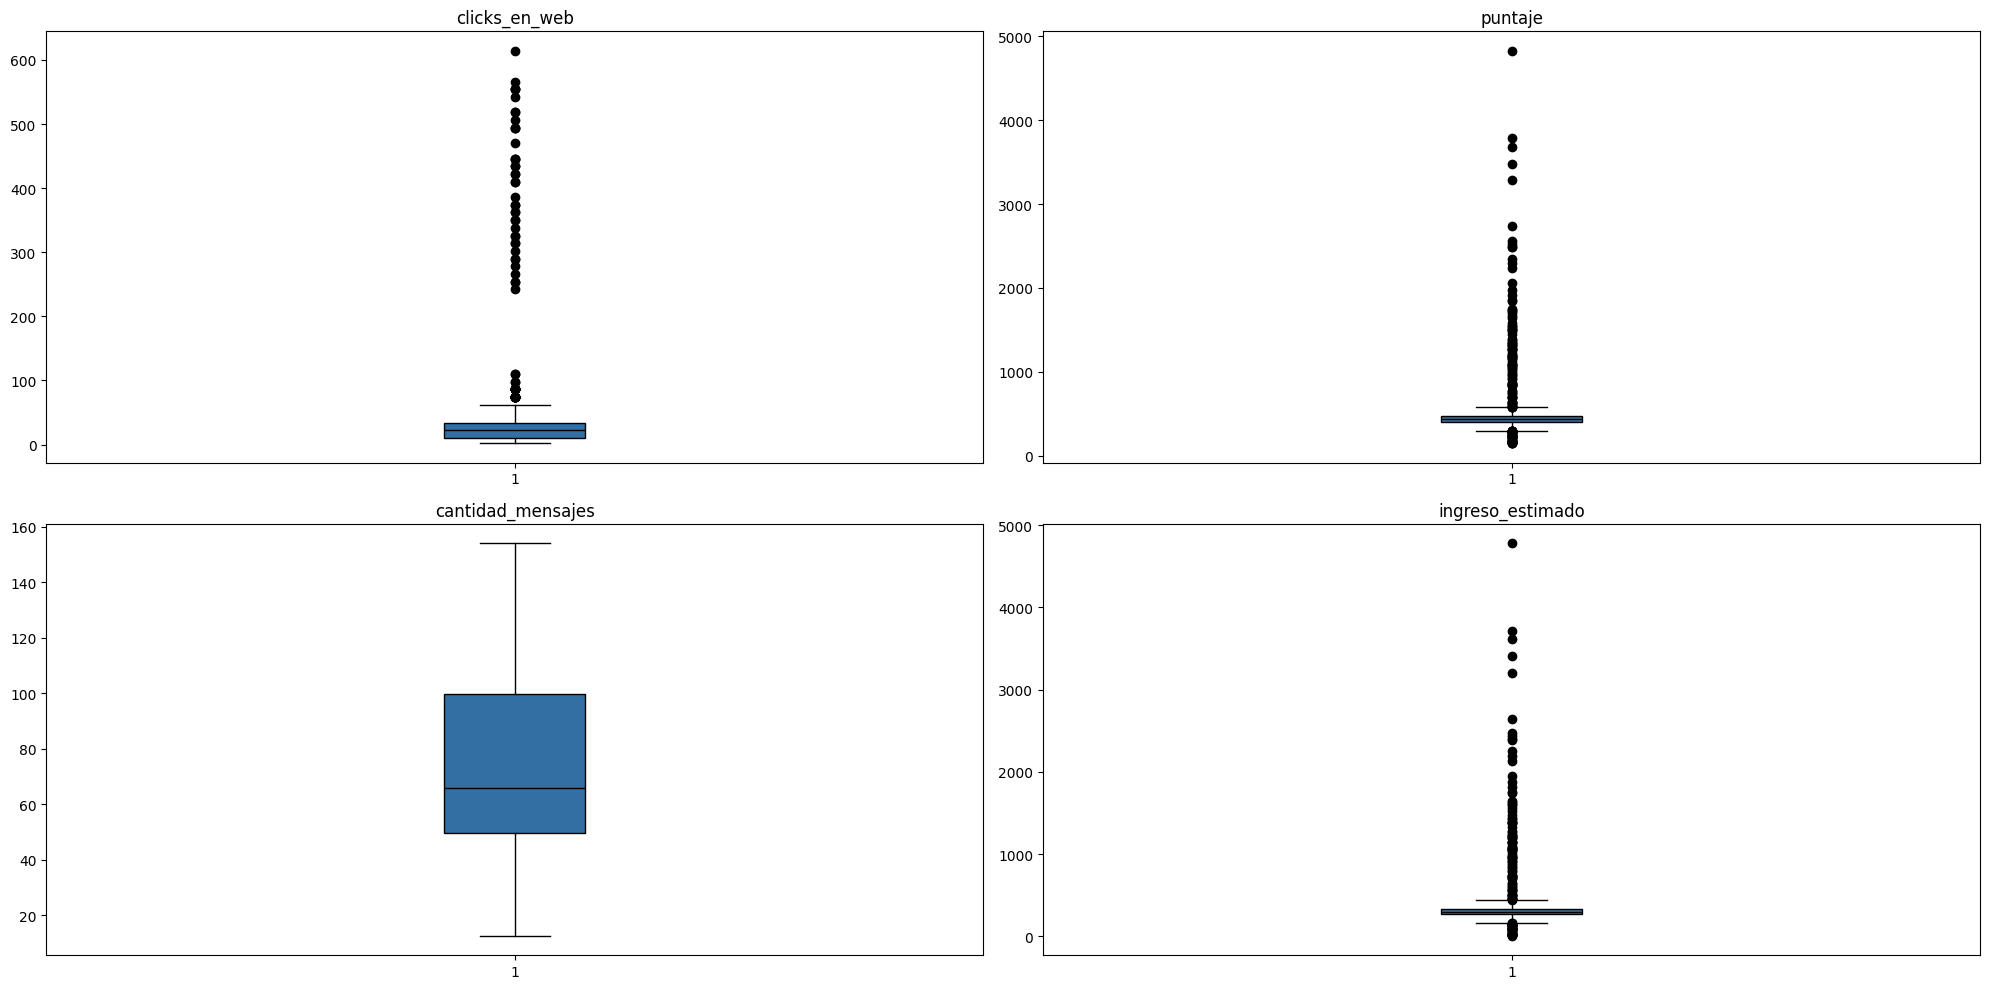

In [264]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_leads_clientes)

In [265]:
df_leads_clientes["clicks_en_web"].mean()

26.527760114669928

In [266]:
df_leads_clientes.columns = df_leads_clientes.columns.str.replace(' ', '_')

1. Calculate the "age" variable (2pts/40pts)


In [267]:
df_leads_clientes["hoy"]= "2023-12-14"
df_leads_clientes['hoy'] = pd.to_datetime(df_leads_clientes['hoy'])
df_leads_clientes['fecha_de_nacimiento'] = pd.to_datetime(df_leads_clientes['fecha_de_nacimiento'])
df_leads_clientes['edad_del_auto'] = (df_leads_clientes['hoy'] - df_leads_clientes['fecha_de_nacimiento']).dt.days//365

In [268]:
df_leads_clientes.head()

,fecha_de_nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente,hoy,edad_del_auto
0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí,2023-12-14,68
1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No,2023-12-14,25
2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí,2023-12-14,61
3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí,2023-12-14,56
4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No,2023-12-14,41


2. Plot a boxplot of the "age" variable (2pts/40pts)


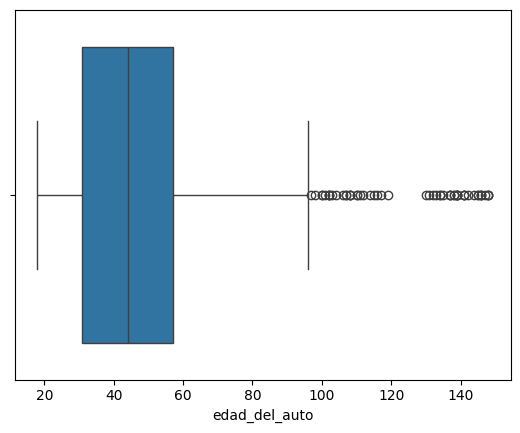

In [269]:
sns.boxplot(x=df_leads_clientes['edad_del_auto'])
plt.show()

In [270]:
df_leads_clientes["edad_del_auto"].max()

148

#### It is almost impossible for a car to be more than 90 years old, so it was decided to remove cars older than 90 years from the dataset in order to perform a more accurate analysis.


In [271]:
df_leads_clientes = df_leads_clientes[df_leads_clientes['edad_del_auto'] <= 90]

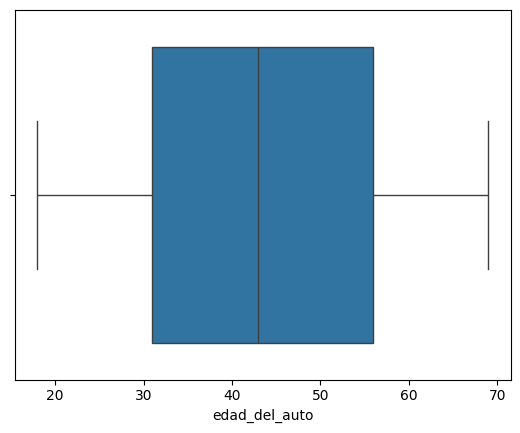

In [272]:
sns.boxplot(x=df_leads_clientes['edad_del_auto'])
plt.show()

3. Plot a boxplot of the "estimated_income" variable by the "category" variable. (2pts/40pts)


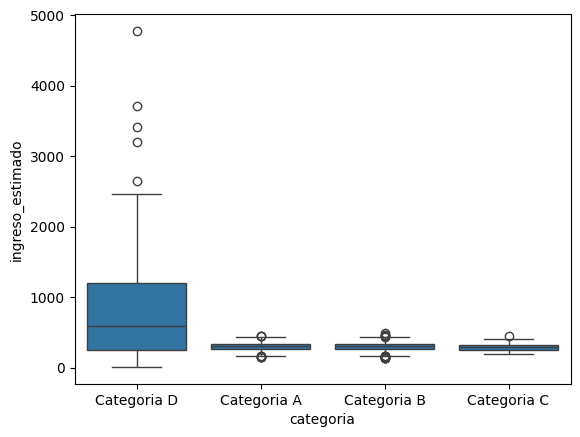

In [273]:
sns.boxplot(x='categoria', y='ingreso_estimado', data=df_leads_clientes)
plt.show()

4. What conclusion can you draw based on the previous boxplot? Based on your explanation, decide whether a category should be removed or not. (8pts/40pts)


In [274]:
df_leads_clientes[df_leads_clientes['cliente'] == 'Sí'].groupby('categoria')['cliente'].count()

categoria
Categoria A    674
Categoria B    663
Categoria C     31
Categoria D     71
Name: cliente, dtype: int64

In [275]:
df_leads_clientes = df_leads_clientes[df_leads_clientes['categoria'] != 'Categoria D']

### I decided to remove category D because it has the highest number of outliers and is also one of the categories with the fewest clients.


5. Plot the variable "message_count" based on whether the person is a client or not. (2pts/40pts)


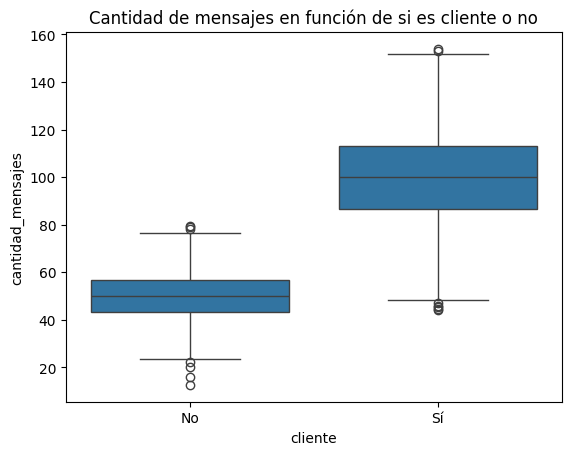

In [276]:
sns.boxplot(x='cliente', y='cantidad_mensajes', data=df_leads_clientes)
plt.title('Cantidad de mensajes en función de si es cliente o no')
plt.show()

6. What conclusions can you draw from this plot? What is your hypothesis? (4pts/40pts)


#### This plot of message count based on whether the person is a client or not could help me understand if there's a difference in the number of messages sent between clients and non-clients.
#### In this case, clients tend to have a higher number of messages. This could suggest that frequent interaction (through messages) may be related to the conversion of a lead into a client.


7. Split the data into training and testing sets (1pts/40pts)


#### I applied Label Encoding to the "category" column in order to train the model.



In [277]:
from sklearn.preprocessing import LabelEncoder
df_leads_clientes_le = LabelEncoder()
df_leads_clientes_le.fit(df_leads_clientes['categoria'])
df_leads_clientes_le.classes_

array(['Categoria A', 'Categoria B', 'Categoria C'], dtype=object)

In [278]:
df_leads_clientes['categoria'] = df_leads_clientes_le.transform(df_leads_clientes['categoria'])

In [279]:
df_leads_clientes['cliente'] = df_leads_clientes['cliente'].map({'Sí': 1, 'No': 0})

In [280]:
X = df_leads_clientes[["edad_del_auto", 'ingreso_estimado', 'cantidad_mensajes', "puntaje", "clicks_en_web", "categoria"]]
y = df_leads_clientes['cliente']

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

8. Train a decision tree (1pts/40pts)


In [282]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

9. Make predictions on the test set (4pts/40pts)


In [283]:
y_pred = decision_tree_model.predict(X_test)


10. Plot a confusion matrix for the test set. (2pts/40pts)


In [284]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = conf_matrix.ravel()

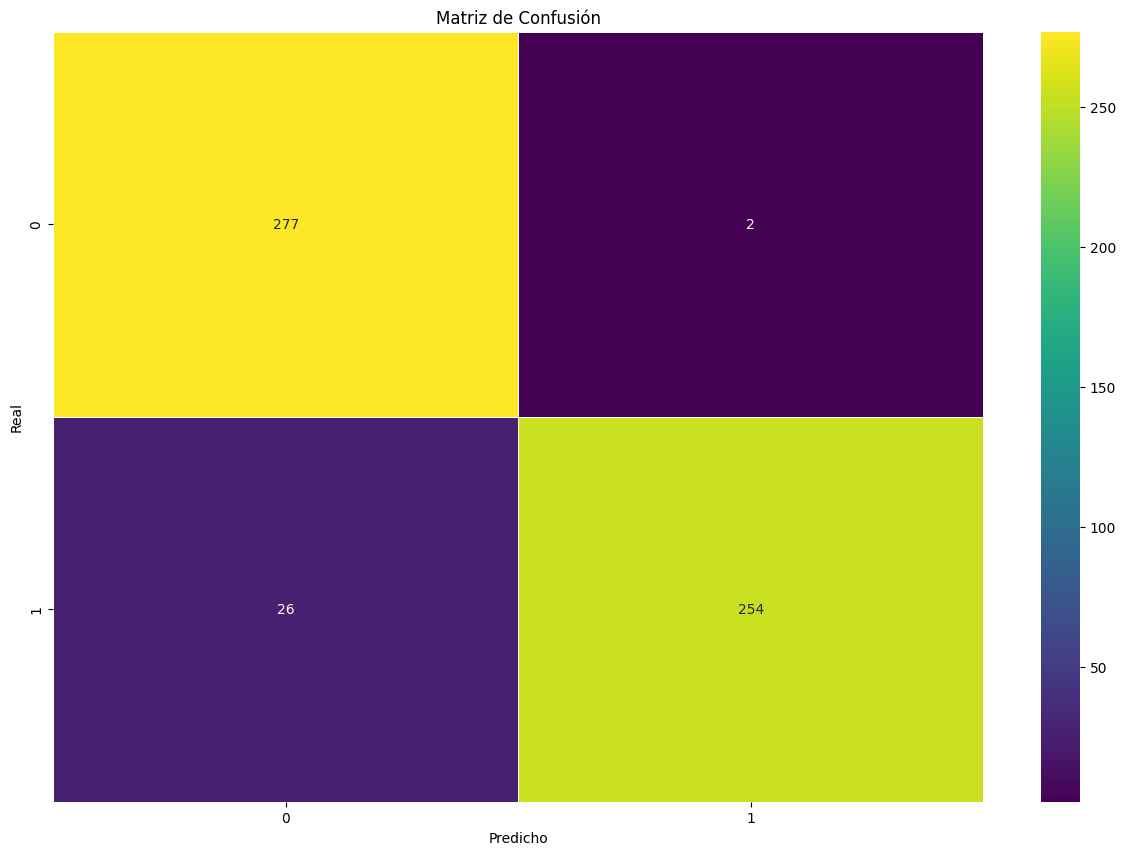

In [285]:
y_true = y_test
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [286]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

print("Precisión:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Exactitud:", accuracy_score(y_true, y_pred))

Precisión: 0.9921875
Recall: 0.9071428571428571
Exactitud: 0.9499105545617174


11. Plot a decision tree. (4pts/40pts)


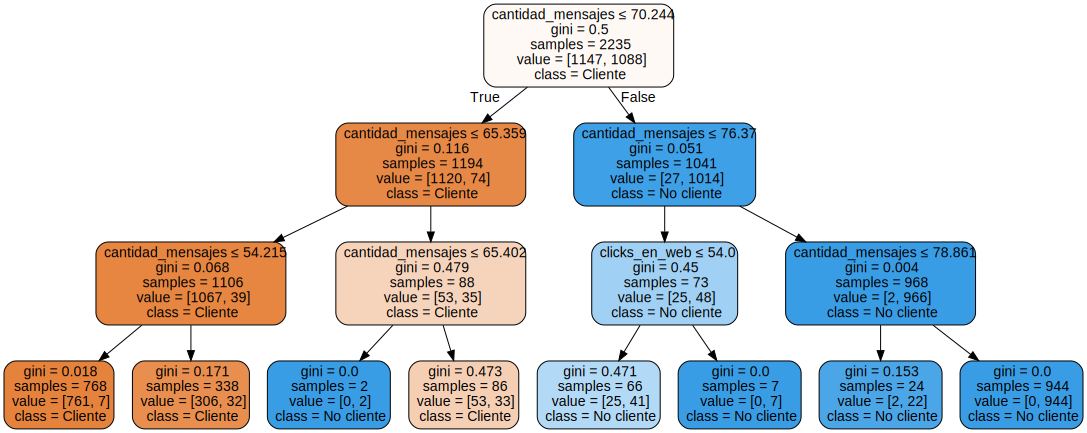

In [287]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Cliente', 'No cliente'],
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")
graph 

12. What is the variable at the root node? What does it mean? Explain it based on the Gini Index criterion. (8pts/40pts)


#### The decision tree has the following structure: a root node (no incoming branches, it performs the first split based on the most important variable), branches (which feed the internal nodes), internal nodes (decision points that further split the data based on variables), and leaf/terminal nodes (which represent all possible outcomes of the dataset and provide the final classification).

#### In this case, the root node variable is "cantidad_mensajes" (number of messages). This means that "cantidad_mensajes" is the most important variable for predicting whether a lead will become a client or not. This is because it has the highest Gini Index, meaning it has the greatest ability to split the data based on the target variable.



___

# Exercise 3: ROI (30pts)
**Data**: Result from the previous exercise.

Based on the results from the confusion matrix on the test set in the previous exercise:

**Context:**  
Your hypotheses were supported by the previous analysis. That is, you demonstrated that these variables are consistent in predicting whether a lead will convert into a customer. Therefore, based on your algorithm, the company should take action. The idea is to run advertisements targeted at leads predicted to become customers. To do this, you must answer the following:

1. If an advertisement costs 10, how much of the advertising budget would be wasted? (10pts/30pts)

2. Looking at the confusion matrix, calculate the ROI of the model assuming:
   - The gain from each converted customer is 150,
   - The advertising cost is 10,
   - The total investment corresponds to the total advertising cost. (20pts/30pts)


In [288]:
print(conf_matrix)

[[277   2]
 [ 26 254]]


In [289]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

1. The wasted advertising corresponds to the cost of advertising for the leads that the model incorrectly predicted as customers. These are the False Positives (FP).  
If each advertisement costs 10, then the total wasted advertising would be: `FP * 10`.


In [290]:
publicidad_desperdiciada = FP * 10
print("El costo de publicidad desperdiciada sería de:", "$", publicidad_desperdiciada)

El costo de publicidad desperdiciada sería de: $ 20


2. The ROI is calculated as `(Revenue - Cost) / Cost`. In this case, the revenue comes from the customers correctly predicted by the model (True Positives - TP), each bringing a profit of 150.  
The cost is the total investment in advertising, which would be `10 * (TP + FP)`.  
Therefore, the ROI would be: `((TP * 150) - 10 * (TP + FP)) / (10 * (TP + FP))`


In [291]:
TP = 254
FP = 2

costo_total_publicidad = 10 * (TP + FP)
print(f"El costo total de publicidad sería: {costo_total_publicidad}")

El costo total de publicidad sería: 2560


In [292]:
ganancias = TP * 150
costo_total_publicidad = 10 * (TP + FP)

In [293]:
ROI = (ganancias - costo_total_publicidad) / costo_total_publicidad
print(f"El ROI del modelo sería: {ROI}")

El ROI del modelo sería: 13.8828125
